In [1]:
# making necessary package imports 
import cv2
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from deepface import DeepFace
import tensorflow as tf 

# Background: Summary and Overview

This file represents the "frontend" of this project, which is where/how the emojis are overlaid onto the subject's face based on their emotion/expression. There are two main components to this part: testing with the pre-trained model, and with models we trained ourselves. 

# Step 1: Using a Pre-Trained Model (DeepFace and CV2)

The first part of this project involves using a pre-trained model to study as a benchmark. First, for study, we explore overlaying an emoji on a singular image using the DeepFace package, following the procedure below. Specifically, we first take an image, identify the emotion expressed by the face in the image, and then overlay an emoji corresponding to that image over the face of the person in the image. The following steps illustrate this example. 

## Model Exploration: Localizing and Testing on an Image

We first take a sample image, analyze it using the Deepface package, and then overlay an emoji corresponding to the emotion of the face in the picture. 

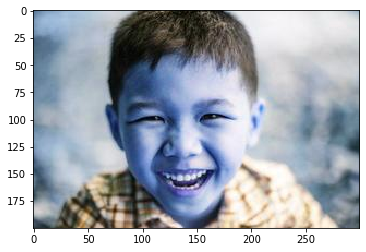

In [2]:
# reading a sample image to test using the DeepFace package. 
boy = cv2.imread("sample-face2.jpg")
plt.imshow(boy)

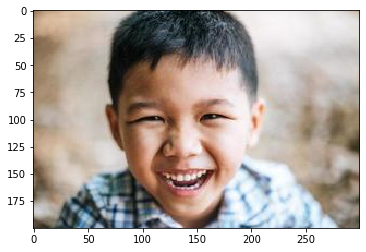

In [3]:
# adding color to the image 
plt.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))

In [4]:
# using the DeepFace analyze method to analyze the features of the image. 
estimates_boy = DeepFace.analyze(boy)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.29it/s]


In [5]:
# estimates_boy returns a dictionary of attributes 
# and probabilities, so we use this for analysis. 
estimates_boy

[{'emotion': {'angry': 0.1154328347183764,
   'disgust': 0.04052645526826382,
   'fear': 97.00143933296204,
   'happy': 2.532093971967697,
   'sad': 0.3073351224884391,
   'surprise': 2.2098484464549983e-05,
   'neutral': 0.0031459214369533584},
  'dominant_emotion': 'fear',
  'region': {'x': 75, 'y': 48, 'w': 131, 'h': 131},
  'age': 22,
  'gender': {'Woman': 0.2164674224331975, 'Man': 99.78353381156921},
  'dominant_gender': 'Man',
  'race': {'asian': 99.75457787513733,
   'indian': 0.013256103557068855,
   'black': 0.00032584721338935196,
   'white': 0.004762272510561161,
   'middle eastern': 5.621278997836043e-07,
   'latino hispanic': 0.2270811703056097},
  'dominant_race': 'asian'}]

In [6]:
# obtaining the predicted emotion using the DeepFace package. 
estimates_boy[0]['dominant_emotion']

'fear'

In [7]:
color_boy = cv2.cvtColor(boy,cv2.COLOR_BGR2GRAY)

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
boy_face = face_cascade.detectMultiScale(color_boy, 1.1, 4)

In [10]:
# defining a set of emojis for use: 
# the 7 features/emotions used in this project are 
# happy, sad, neutral, angry, disgust, fear, and surprise. 

happy_emoji = cv2.imread('emojis/happy_emoji.png', cv2.IMREAD_UNCHANGED)
sad_emoji = cv2.imread('emojis/sad_emoji.png', cv2.IMREAD_UNCHANGED)
neutral_emoji = cv2.imread('emojis/neutral_emoji.png', cv2.IMREAD_UNCHANGED)
angry_emoji = cv2.imread('emojis/angry_emoji.png', cv2.IMREAD_UNCHANGED)
disgust_emoji = cv2.imread('emojis/disgust_emoji.png', cv2.IMREAD_UNCHANGED)
fear_emoji = cv2.imread('emojis/fear_emoji.png', cv2.IMREAD_UNCHANGED)
surprise_emoji = cv2.imread('emojis/surprise_emoji.png', cv2.IMREAD_UNCHANGED)

# function to convert an emotion to its 
# corresponding emoji image. 
def emoji_overlay(emotion): 
    
    # if the predicted emotion is an int (output of the trained models)
    # map the int predictions to the images. 
    if type(emotion) is int: 
        emotion_map = {0: angry_emoji, 
                       1: disgust_emoji, 
                       2: fear_emoji, 
                       3: happy_emoji, 
                       4: sad_emoji, 
                       5: surprise_emoji, 
                       6: neutral_emoji}
    # else, map the results of the DeepFace analysis to 
    # its corresponding emoji parts. 
    else: 
        emotion_map = {"angry": angry_emoji,
                 "disgust": disgust_emoji, 
                 "fear": fear_emoji, 
                 "happy": happy_emoji, 
                 "sad": sad_emoji, 
                 "surprise": surprise_emoji, 
                 "neutral": neutral_emoji}
    
    return emotion_map[emotion]

    

Emotion:  fear


Text(0.5, 1.0, 'Predicted Emoji')

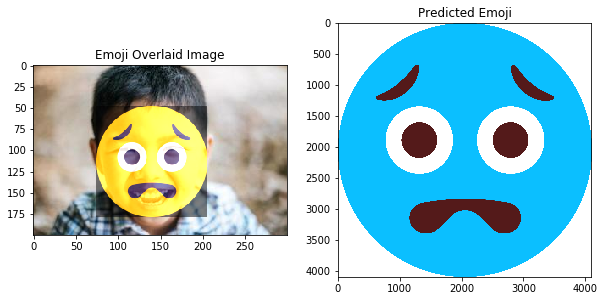

In [11]:
# overlaying the emoji over the face of the boy in the image. 

emotion = estimates_boy[0]['dominant_emotion']

# obtaining the predicted emoji 
predicted_emoji = emoji_overlay(emotion)

resized_emoji = cv2.resize(predicted_emoji, (100, 100))

# overlaying the predicted image over the face in the image, 
# calculating the face location to localize and overlay directly over the face. 
for (x, y, w, h) in boy_face: 
    face = boy[y:y+h, x:x+w]
    emoji = predicted_emoji 
    emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)
    if emoji.shape[2] == 4:
            emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
    overlay = cv2.addWeighted(face, 0.5, emoji, 0.9, 0)
    boy[y:y+h, x:x+w] = overlay
    

# showing the image with the overlaid emoji, corresponding to the 
# expression given by the face as predicted by DeepFace. 
print("Emotion: ", emotion)

# plotting the results 
fig, (a1, a2) = plt.subplots(1, 2, figsize=(10,5))

a1.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))
a1.set_title("Emoji Overlaid Image")

a2.imshow(predicted_emoji)
a2.set_title("Predicted Emoji")



## Overlaying Emoji on Live Video
The next steps will involve overlaying an emoji on a live video. To run, simply run the below cell, and a video window will pop-up. To exist the video, press "q" for quit. 

This process involves reading the images, similar to the process above, but instead of analyzing each frame of the video as an image, and overlaying the emoji based on the expression at the particular instance for the subject in the image. Specifically, the video of the subject is first captured, and each frame in the video is considered as the "picture", on which analysis is performed using DeepFace, after which the corresponding emoji is overlaid. The emojis that were considered for this study were happy, sad, neutral, angry, disgust, fear, and surprise. 

**Note: To run the below function, make sure to first run the emoji_overlay function.**
<br>
**Also, when running the full notebook, make sure to quit the video window before running other cells**

In [12]:
# importing the necessary packages 
import cv2
from deepface import DeepFace
import numpy as np

# loading the face classifier: haarcascade to analyze facial emotions. 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# using the cv2 library to establish the video 
v = cv2.VideoCapture(0)

while True:
    # analyzing a single frame from the video, and using it to 
    # convert into an image to process the emotions. 
    _, frame = v.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # using the facecascade to get the detection of the face in the image 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        # getting the coordinates of the localized face 
        # and analyzing the face/image for a specific emotion 
        face = frame[y:y+h, x:x+w]
        result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        emotion = result[0]['dominant_emotion']
        
        # using the overlay function to determine the emoji corresponding to the 
        # detected emotion, to use for overlay, and resizing the emoji to fit the size 
        # of the identified and localized face. 
        emoji = emoji_overlay(emotion)
        emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)

        if emoji.shape[2] == 4:
            emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
            
        # overlaying the emoji to the face in the video 
        overlay = cv2.addWeighted(face, 1, emoji, 0.5, 0)        
        frame[y:y+h, x:x+w] = overlay
    
    cv2.imshow('Live Emoji Overlay Video', frame)
    
    # exit the window and video player on quit (pressing the 'q' key)
    if cv2.waitKey(1) == ord('q'):
        break

v.release()
cv2.destroyAllWindows()


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


# Step 2: Overlaying Emojis on Trained Models

In Step 1, we overlaid emojis on images, and did a live demo of overlaying emojis over a person's face in a live video, using the pre-trained model (CV2 and DeepFace). In this step, we overlay emojis on the images based off of the predictions of the models we trained, which are namely the basic CNN model, the mobile net model, and the separable CNN model. These models were trained in a separate file. 

## Loading the Trained Models using H5: Basic CNN Model

In [13]:
import tensorflow as tf

# loading models 
basic_cnn_model = tf.keras.models.load_model("basic_cnn_model.h5", compile=False)
basic_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Loading the Mobile Net Model

In [14]:
mobile_net_model = tf.keras.models.load_model("mobile_net_model.h5", compile=False)
mobile_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Loading the Separable CNN Model 

In [15]:
separable_cnn_model = tf.keras.models.load_model("separable_cnn_model.h5", compile=False)
separable_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# function to preprcoess an image for analysis 
def preprocess_image(image_path, target_size=(48, 48)):
    img = image.load_img(image_path, target_size=target_size, color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array

image_path = "sample-face2.jpg"
img_array = preprocess_image(image_path)

## Getting the Model Prediction Class of an Image: Basic CNN 

In [17]:
# the class of predictions is a distribution of values
# so the predicted value is the one with the highest probability
predictions = basic_cnn_model.predict(img_array)
predicted_class = np.argmax(predictions)

print("Basic CNN - Predicted class:", predicted_class)

Basic CNN - Predicted class: 5


## Getting the Prediction Class: Mobile Net

In [18]:
mobile_net_predictions = mobile_net_model.predict(img_array)
mobile_net_predicted_class = np.argmax(mobile_net_predictions)

print("Mobile Net - Predicted class:", mobile_net_predicted_class)

Mobile Net - Predicted class: 4


## Getting the Prediction Class: Separable CNN

In [19]:
separable_cnn_predictions = separable_cnn_model.predict(img_array)
separable_cnn_predicted_class = np.argmax(separable_cnn_predictions)

print("Separable CNN - Predicted class:", separable_cnn_predicted_class)

Separable CNN - Predicted class: 2


## Converting Predictions to Images

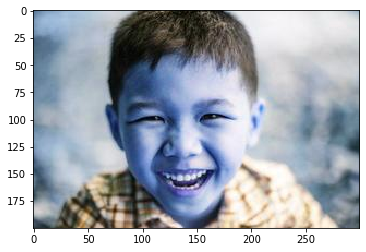

In [20]:
boy = cv2.imread("sample-face2.jpg")
plt.imshow(boy)

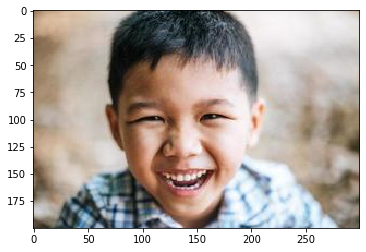

In [21]:
plt.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))

In [22]:
color_boy = cv2.cvtColor(boy,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
boy_face = face_cascade.detectMultiScale(color_boy, 1.1, 4)

## Basic CNN Classifier: Calculating/Overlaying the Emoji Associated with Prediction

Predicted Emotion:  surprise


Text(0.5, 1.0, 'Basic CNN Classifier Predicted Emoji')

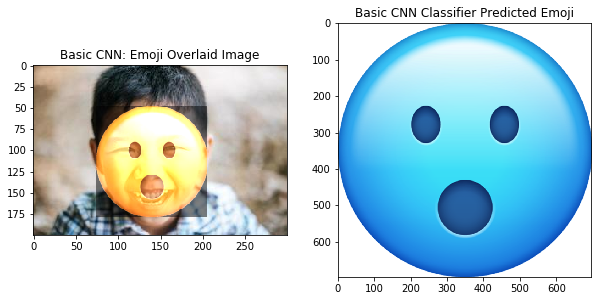

In [23]:
emotions_dict = {0: 'angry', 
                       1: 'disgust', 
                       2: 'fear', 
                       3: 'happy', 
                       4: 'sad', 
                       5: 'surprise', 
                       6: 'neutral'}

predicted_emoji = emoji_overlay(int(predicted_class))

resized_emoji = cv2.resize(predicted_emoji, (100, 100))

# overlaying the predicted image over the face in the image, 
# calculating the face location to localize and overlay directly over the face. 
for (x, y, w, h) in boy_face: 
    face = boy[y:y+h, x:x+w]
    emoji = predicted_emoji 
    emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)
    if emoji.shape[2] == 4:
            emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
    overlay = cv2.addWeighted(face, 0.5, emoji, 0.9, 0)
    boy[y:y+h, x:x+w] = overlay
    

# showing the image with the overlaid emoji, corresponding to the 
# expression given by the face as predicted by basic CNN. 
print("Predicted Emotion: ", emotions_dict[predicted_class])

fig, (a1, a2) = plt.subplots(1, 2, figsize=(10,5))

a1.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))
a1.set_title("Basic CNN: Emoji Overlaid Image")

a2.imshow(predicted_emoji)
a2.set_title("Basic CNN Classifier Predicted Emoji")



**Note: Testing the Basic CNN with the above image was executed in steps to illustrate the process**
<br>
**The remainder of the tests will delegate to a common function to predict and overlay emojis**

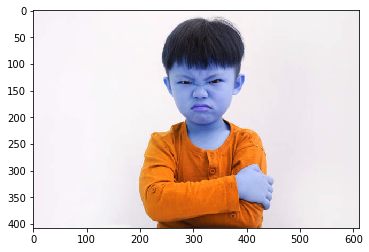

In [24]:
# utility functions to work with images 
def get_image(image_path): 
    return cv2.imread(image_path)

def show_image(image_path): 
    
    plt.imshow(get_image(image_path))
        
    
show_image("angry_boy.jpg")

In [25]:
# function to predict and overlay an emoji 
# based on the given image, and predictions from a model. 
def predict_and_overlay_emoji(image_path, predictions):
    face_image = get_image(image_path)
    colored = cv2.cvtColor(face_image,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    person_face = face_cascade.detectMultiScale(colored, 1.1, 4)
    
    predicted_emoji = emoji_overlay(int(predictions))
    resized_emoji = cv2.resize(predicted_emoji, (100, 100))

    # overlaying the predicted image over the face in the image, 
    # calculating the face location to localize and overlay directly over the face. 
    for (x, y, w, h) in person_face: 
        face = face_image[y:y+h, x:x+w]
        emoji = predicted_emoji 
        emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)
        if emoji.shape[2] == 4:
                emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
        overlay = cv2.addWeighted(face, 0.5, emoji, 0.9, 0)
        face_image[y:y+h, x:x+w] = overlay
    

    # showing the image with the overlaid emoji, corresponding to the 
    # expression given by the face as predicted by the trained model. 
    print("Predicted Emotion: ", emotions_dict[predictions])

    fig, (a1, a2) = plt.subplots(1, 2, figsize=(10,5))

    a1.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
    a1.set_title("Emoji Overlaid Image")

    a2.imshow(predicted_emoji)
    a2.set_title("Predicted Emoji")

## Mobile Net: Calculating/Overlaying the Emoji Associated with Prediction

Mobile Net Predictions and Images
Predicted Emotion:  sad


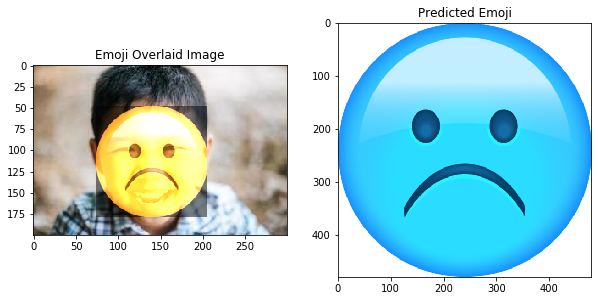

In [26]:
print("Mobile Net Predictions and Images")
predict_and_overlay_emoji("sample-face2.jpg", mobile_net_predicted_class)

## Separable CNN: Calculating/Overlaying the Emoji Associated with Prediction

Separable CNN Predictions and Images
Predicted Emotion:  fear


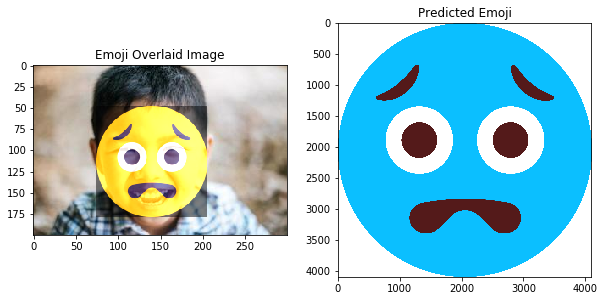

In [27]:
print("Separable CNN Predictions and Images")
predict_and_overlay_emoji("sample-face2.jpg", separable_cnn_predicted_class)

# Step 3: Testing Models with Other Images

In [28]:
# function to get the prediction of the model 
# given a model name and image array 
def model_predictions(img_array, model): 
    if model ==  "basic": 
        predictions = basic_cnn_model.predict(img_array)
        predicted_class = np.argmax(predictions)
    elif model == "mobile": 
        predictions = mobile_net_model.predict(img_array)
        predicted_class = np.argmax(predictions)
    elif model == "separable": 
        predictions = separable_cnn_model.predict(img_array)
        predicted_class = np.argmax(predictions)
    
    return predicted_class         

In [29]:
img2_path = "angry_boy.jpg"
img2_array = preprocess_image(img2_path)

## Basic CNN Model Predictions on Angry Boy Image

In [30]:
basic_img2 = model_predictions(img2_array, "basic")
basic_img2 

6

## Mobile Net Model Predictions on Angry Boy Image

In [31]:
mobile_img2 = model_predictions(img2_array, "mobile")
mobile_img2

4

## Separable CNN Model Predictions on Angry Boy Image

In [32]:
separable_img2 = model_predictions(img2_array, "separable")
separable_img2

4

## Basic CNN: Overlaying the Emoji Associated with Prediction - Angry Boy

Basic CNN Predictions on Image
Predicted Emotion:  neutral


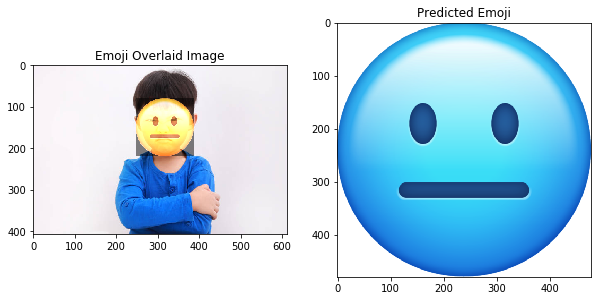

In [33]:
print("Basic CNN Predictions on Image")
predict_and_overlay_emoji("angry_boy.jpg", basic_img2)

## Mobile Net: Overlaying the Emoji Associated with Prediction - Angry Boy

Mobile Net Predictions on Image
Predicted Emotion:  sad


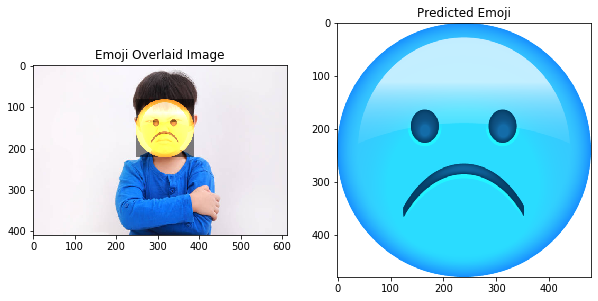

In [34]:
print("Mobile Net Predictions on Image")
predict_and_overlay_emoji("angry_boy.jpg", mobile_img2)

## Separable CNN: Overlaying the Emoji Associated with Prediction - Angry Boy

Separable CNN Predictions on Image
Predicted Emotion:  sad


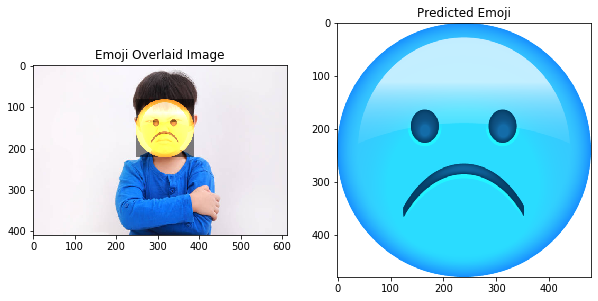

In [35]:
print("Separable CNN Predictions on Image")
predict_and_overlay_emoji("angry_boy.jpg", separable_img2)

# Conclusion and Summary

In summary, we used a series of models to detect emotions in a face and successfully map an emoji over the face of the subject in the picture. As a first step, the pretrained model DeepFace was used as a baseline, in order to understand localization with images. This was further extended to successfully implement live video overlay with emojis. 

For the second step, we trained our own models (namely basic CNN, mobile net, and separable CNN) in order to predict the class of emotion that the subject in the image exhibited. This was trained on the FER data set, which consisted of 48x48 pixel images. After training, the predicted emojis were overlaid on the original image/face of the person in the image, using localization and the results of the prediction. This was repeated for different images, showing effectiveness of overlaying an emoji over a person's face, corresponding to the emotion while being localized to the person's face in the original image. 